# Banking Marketing Campaign

In [1]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep = ";")
total_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2]:
print(total_data.shape)

(41188, 21)


The dataset is divided into 11 categorical and 10 numerical variables:
- numerical: age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed
- categorical: job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome, y

Variable "y" is our target. 

In [3]:
#Checking for null values
print(total_data.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


It is important to mention that there are no null values.

In [4]:
#Checking for duplicates
duplicates = total_data[total_data.duplicated()]
print(duplicates)

       age          job   marital            education  default housing loan  \
1266    39  blue-collar   married             basic.6y       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16956   47   technician  divorced          high.school       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20216   55     services   married          high.school  unknown      no   no   
20534   41   technician   married  professional.course       no     yes   no   
25217   39       admin.   married    university.degree       no      no   no   
28477   24     services    single          high.school       no     yes   no   
32516   35       admin.   married    university.degree       no     yes   no   
36951   45       admin.   married    university.degree       no      no   no   
38281   71      retired    single    uni

In [5]:
#Removing duplicated rows 
total_data = total_data.drop_duplicates().reset_index(drop = True)
print(total_data.shape)

(41176, 21)


12 duplicated rows have been removed.

In [6]:
#Eliminating irrelevant information
total_data.drop(["pdays"], axis = 1, inplace = True)
total_data.head() 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


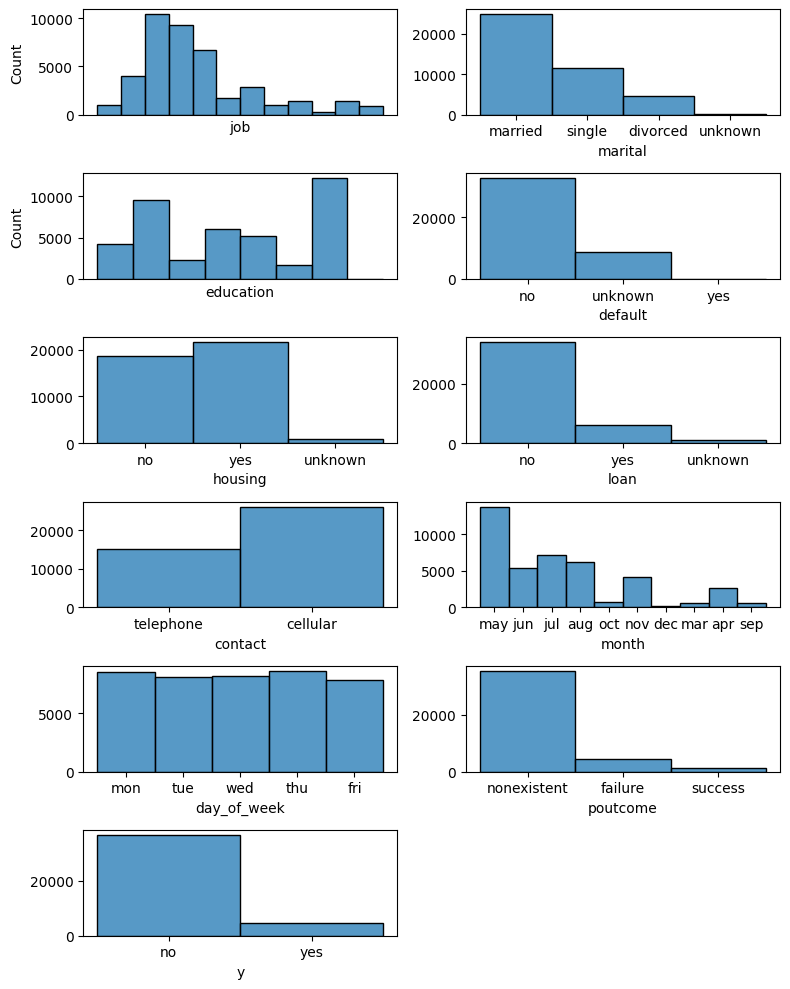

In [7]:
#Analysis of univariate variables

import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(6, 2, figsize = (8, 10))

sns.histplot(total_data, x = "job", ax = axis[0, 0]).set_xticks([])
sns.histplot(total_data, x = "marital", ax = axis[0, 1]).set(ylabel = None)
sns.histplot(total_data, x = "education", ax = axis[1, 0]).set_xticks([])
sns.histplot(total_data, x = "default", ax = axis[1, 1]).set(ylabel = None)
sns.histplot(total_data, x = "housing", ax = axis[2, 0]).set(ylabel = None)
sns.histplot(total_data, x = "loan", ax = axis[2, 1]).set(ylabel = None)
sns.histplot(total_data, x = "contact", ax = axis[3, 0]).set(ylabel = None)
sns.histplot(total_data, x = "month", ax = axis[3, 1]).set(ylabel = None)
sns.histplot(total_data, x = "day_of_week", ax = axis[4, 0]).set(ylabel = None)
sns.histplot(total_data, x = "poutcome", ax = axis[4, 1]).set(ylabel = None)
sns.histplot(total_data, x = "y", ax = axis[5, 0]).set(ylabel = None)

fig.delaxes(axis[5,1])

plt.tight_layout()

plt.show()

From the previous graphs, we can conclude that:
- there's some variety in the "job" variable, but most of the clients are admins, blue-collars or technicians
- the number of married clients is twice as high as the number of single ones, whereas the divorced ones are even less than the singles
- There's some diversity as well in the "education" variable, but most clients have a university degree or finished high school
- most contacted clients do not have a credit or a loan at the moment
- there is not a significant difference between clients who have a housing loan at the moment and clients who do not
- almost twice as many people were contacted on their mobile phones than on their home line
- most clients were contacted in may
- there were slightly more contacts on Mondays and Thursdays, there is no significant relevance regarding the day of the week each client was contacted
- most clients had not been contacted in the previous marketing campaign and there is not a really significant difference between the number of failures and successes
- the vast majority of clients do not take out a long-term deposit


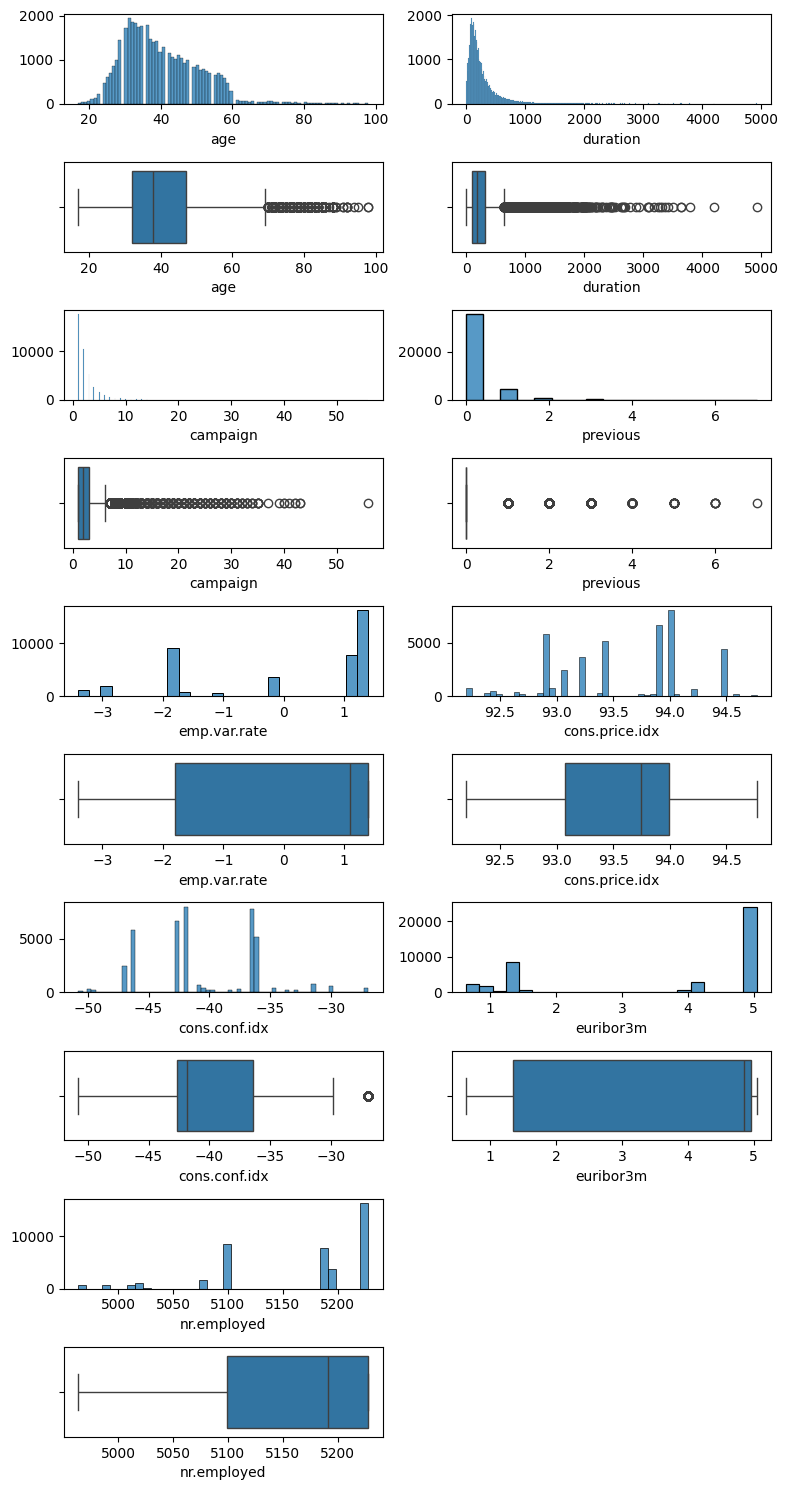

In [8]:
fig, axis = plt.subplots(10, 2, figsize = (8, 15))

sns.histplot(total_data, x = "age", ax = axis[0, 0]).set(ylabel = None)
sns.boxplot(total_data, x = "age", ax = axis[1, 0]).set(ylabel = None)

sns.histplot(total_data, x = "duration", ax = axis[0, 1]).set(ylabel = None)
sns.boxplot(total_data, x = "duration", ax = axis[1, 1]).set(ylabel = None)

sns.histplot(total_data, x = "campaign", ax = axis[2, 0]).set(ylabel = None)
sns.boxplot(total_data, x = "campaign", ax = axis[3, 0]).set(ylabel = None)

sns.histplot(total_data, x = "previous", ax = axis[2, 1]).set(ylabel = None)
sns.boxplot(total_data, x = "previous", ax = axis[3, 1]).set(ylabel = None)

sns.histplot(total_data, x = "emp.var.rate", ax = axis[4, 0]).set(ylabel = None)
sns.boxplot(total_data, x = "emp.var.rate", ax = axis[5, 0]).set(ylabel = None)

sns.histplot(total_data, x = "cons.price.idx", ax = axis[4, 1]).set(ylabel = None)
sns.boxplot(total_data, x = "cons.price.idx", ax = axis[5, 1]).set(ylabel = None)

sns.histplot(total_data, x = "cons.conf.idx", ax = axis[6, 0]).set(ylabel = None)
sns.boxplot(total_data, x = "cons.conf.idx", ax = axis[7, 0]).set(ylabel = None)

sns.histplot(total_data, x = "euribor3m", ax = axis[6, 1]).set(ylabel = None)
sns.boxplot(total_data, x = "euribor3m", ax = axis[7, 1]).set(ylabel = None)

sns.histplot(total_data, x = "nr.employed", ax = axis[8, 0]).set(ylabel = None)
sns.boxplot(total_data, x = "nr.employed", ax = axis[9, 0]).set(ylabel = None)


plt.delaxes(ax=axis[8, 1]);plt.delaxes(ax=axis[9, 1])

plt.tight_layout()

plt.show()

From the previous graphs, we can conclude that:
- "Age": The distribution is more or less normal, with the majority of clients falling between 35 and 45 years old. There is quite a few outliers over 60 years old. 
- Variables such as "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", and "nr.employed" show different distributions and ranges, which makes sense because conditions may have varied during the campaign. 
- Variables related to the campaign such as "duration", "campaign" and "previous" show a relevant amount of outliers. 

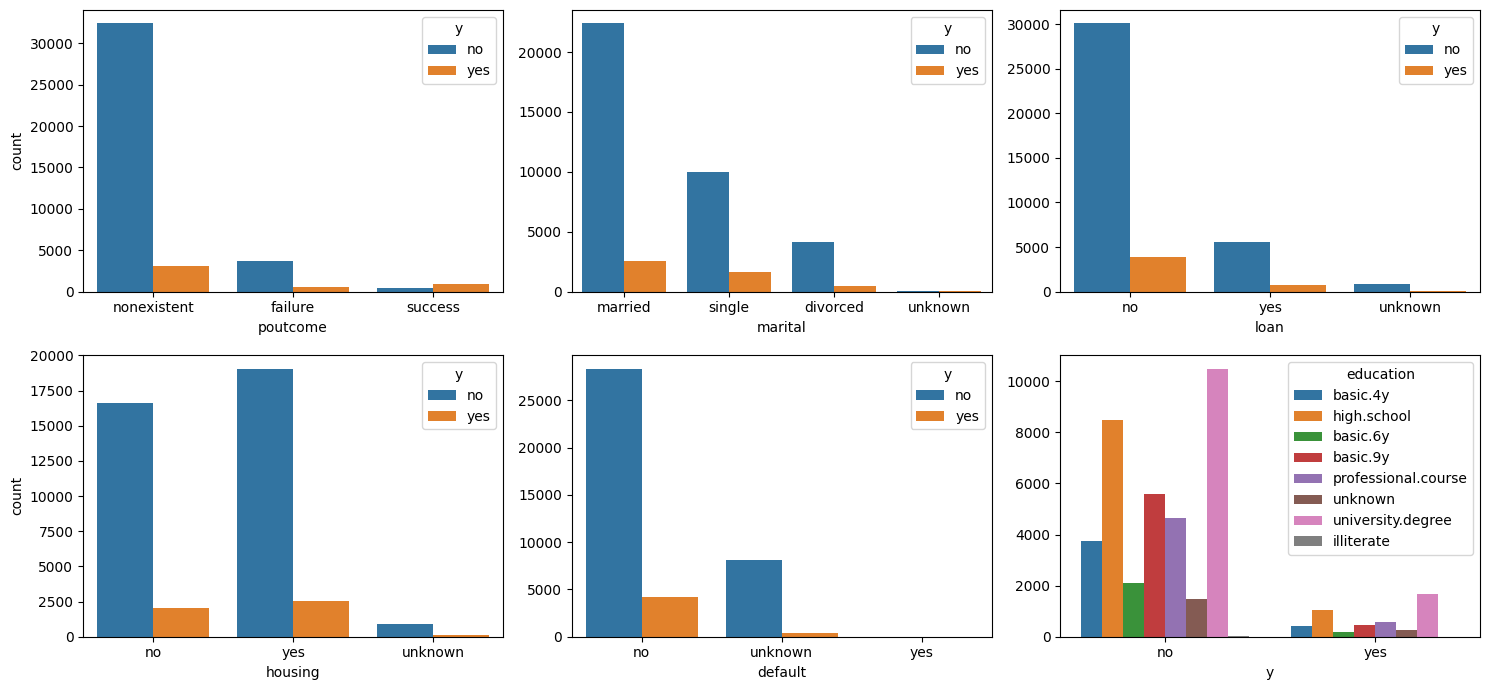

In [9]:
#Analysis of multivariate variable

#Categorical-categorical analysis

fig, axis = plt.subplots(2, 3, figsize = (15, 7))

sns.countplot(ax = axis[0, 0], data = total_data, x = "poutcome", hue = "y")
sns.countplot(ax = axis[0, 1], data = total_data, x = "marital", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[0, 2], data = total_data, x = "loan", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[1, 0], data = total_data, x = "housing", hue = "y")
sns.countplot(ax = axis[1, 1], data = total_data, x = "default", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[1, 2], data = total_data, x = "y", hue = "education").set(ylabel = None)

plt.tight_layout()

plt.show()

From the previous countplots, we can conclude that:
- Clients who have a "success" outcome in the previous marketing campaign tend to have a higher likelihood of subscribing to the term deposit. 
- There doesn't seem to be a significant tendency in subscription rates if we take into account clients' marital status. Yet, married ones have a slightly higher likelihood compared to singles or divorcees.
- Personal loans and credits seem to have some influence when subscribing to term deposits since clients with no personal loans have a slightly higher subscription rate.
- There is some variation in subscription rates across different education levels but we can see that clients with higher education levels tend to have a higher subscription rate compared to those with lower education levels.

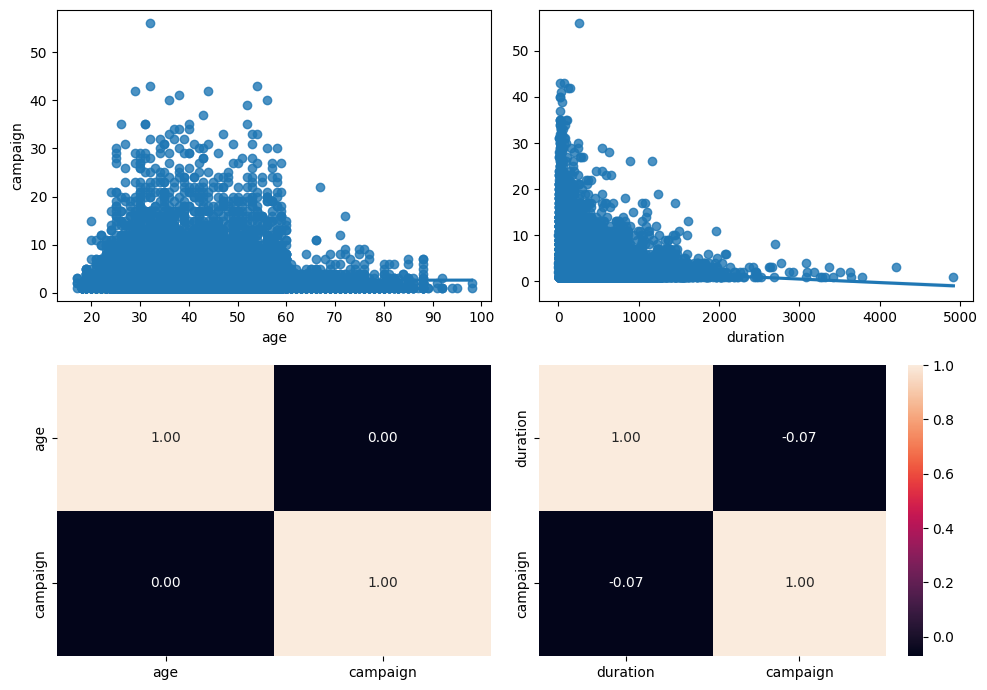

In [10]:
#Analysis of multivariate variable

#Numerical - numerical analysis

fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = total_data, x = "age", y = "campaign")
sns.heatmap(total_data[["age", "campaign"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "duration", y = "campaign").set(ylabel=None)
sns.heatmap(total_data[["duration", "campaign"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

From the scatter plots and correlation heatmaps we can conclude that:
- Age vs. Campaign: Both the scatter plot and the correlation heatmap do not show a no clear linear relationship or correlation between these two variables during the campaign.
- Duration vs. Campaign: There is a slight positive trend between the number of contacts during the current campaign and the duration of the last contact, which could tell us that longer contact durations in the last campaign lead to more contacts in the present. 

In [11]:
#Correlation analysis: Factorizing categorial values
total_data["job_n"] = pd.factorize(total_data["job"])[0]
total_data["marital_n"] = pd.factorize(total_data["marital"])[0]
total_data["education_n"] = pd.factorize(total_data["education"])[0]
total_data["default_n"] = pd.factorize(total_data["default"])[0]
total_data["housing_n"] = pd.factorize(total_data["housing"])[0]
total_data["loan_n"] = pd.factorize(total_data["loan"])[0]
total_data["contact_n"] = pd.factorize(total_data["contact"])[0]
total_data["month_n"] = pd.factorize(total_data["month"])[0]
total_data["day_of_week_n"] = pd.factorize(total_data["day_of_week"])[0]
total_data["poutcome_n"] = pd.factorize(total_data["poutcome"])[0]
total_data["y_n"] = pd.factorize(total_data["y"])[0]

total_data.drop_duplicates(["job", "job_n"])[["job", "job_n"]].to_csv("/workspaces/machine-learning-your-first-ml-algorithm/data/processed/job_to_jobn.csv", index = False)
total_data.drop_duplicates(["marital", "marital_n"])[["marital", "marital_n"]].to_csv("/workspaces/machine-learning-your-first-ml-algorithm/data/processed/marital_to_maritaln.csv", index = False)
total_data.drop_duplicates(["education", "education_n"])[["education", "education_n"]].to_csv("/workspaces/machine-learning-your-first-ml-algorithm/data/processed/education_to_educationn.csv", index = False)
total_data.drop_duplicates(["default", "default_n"])[["default", "default_n"]].to_csv("/workspaces/machine-learning-your-first-ml-algorithm/data/processed/default_to_defaultn.csv", index = False)
total_data.drop_duplicates(["housing", "housing_n"])[["housing", "housing_n"]].to_csv("/workspaces/machine-learning-your-first-ml-algorithm/data/processed/housing_to_housingn.csv", index = False)
total_data.drop_duplicates(["loan", "loan_n"])[["loan", "loan_n"]].to_csv("/workspaces/machine-learning-your-first-ml-algorithm/data/processed/loan_to_loann.csv", index = False)
total_data.drop_duplicates(["contact", "contact_n"])[["contact", "contact_n"]].to_csv("/workspaces/machine-learning-your-first-ml-algorithm/data/processed/contact_to_contactn.csv", index = False)
total_data.drop_duplicates(["month", "month_n"])[["month", "month_n"]].to_csv("/workspaces/machine-learning-your-first-ml-algorithm/data/processed/month_to_monthn.csv", index = False)
total_data.drop_duplicates(["day_of_week", "day_of_week_n"])[["day_of_week", "day_of_week_n"]].to_csv("/workspaces/machine-learning-your-first-ml-algorithm/data/processed/day_of_week_to_day_of_weekn.csv", index = False)
total_data.drop_duplicates(["poutcome", "poutcome_n"])[["poutcome", "poutcome_n"]].to_csv("/workspaces/machine-learning-your-first-ml-algorithm/data/processed/poutcome_to_poutcomen.csv", index = False)
total_data.drop_duplicates(["y", "y_n"])[["y", "y_n"]].to_csv("/workspaces/machine-learning-your-first-ml-algorithm/data/processed/y_to_yn.csv", index = False)



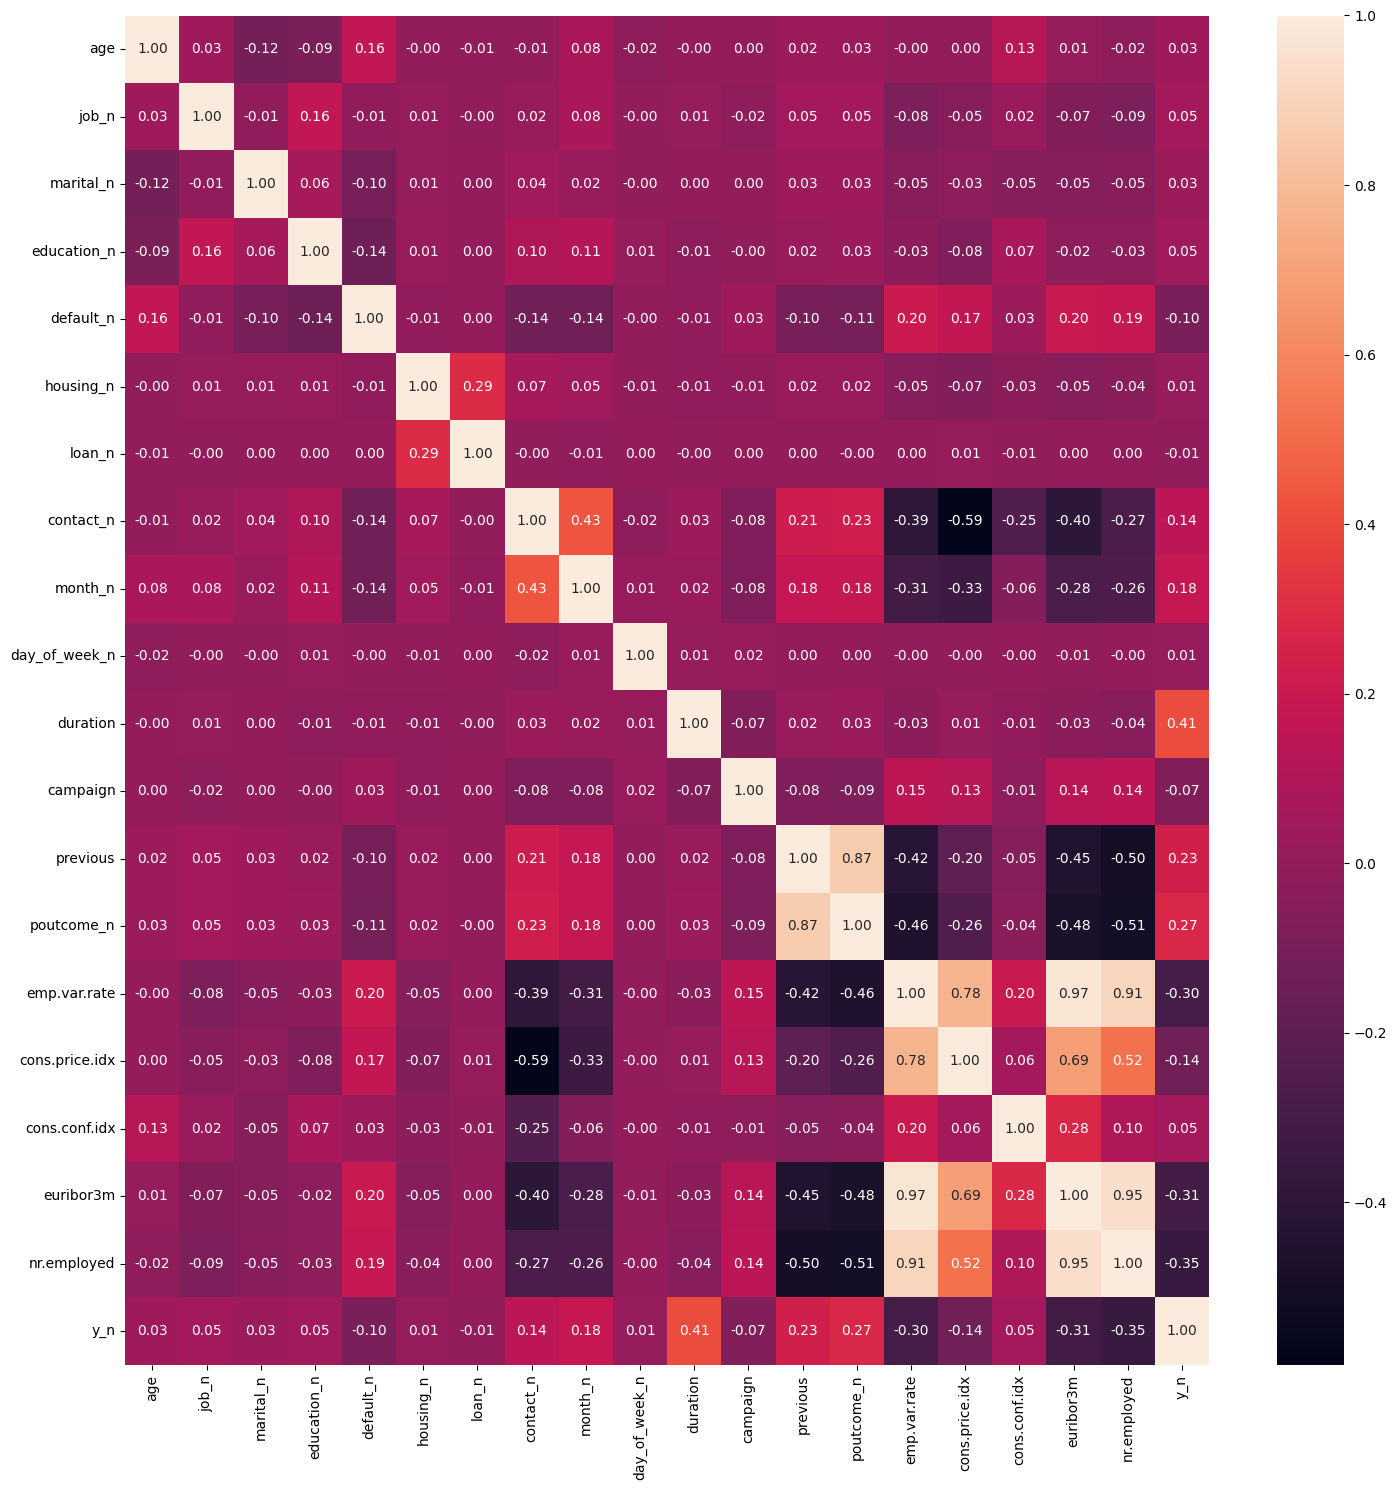

In [12]:
#Heatmap creation
fig, axes = plt.subplots(figsize=(15, 15))
sns.heatmap(total_data[["age", "job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "contact_n", "month_n", "day_of_week_n", "duration", "campaign", "previous", "poutcome_n", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y_n"]].corr(), annot = True, fmt = ".2f")
plt.tight_layout()
plt.show()

From the correlation heatmap we can conclude that:
- Our target variable ("y_n") shows correlation with several variables ("age", "job_n", "education_n", "contact_n", "duration" and "previous") which may have some influence when deciding to subscribe to a term deposit. 
- There is also a slight positive correlation between the number of previous contacts and the duration of the last one, indicating that clients contacted more frequently in the past might have longer calls in the present.

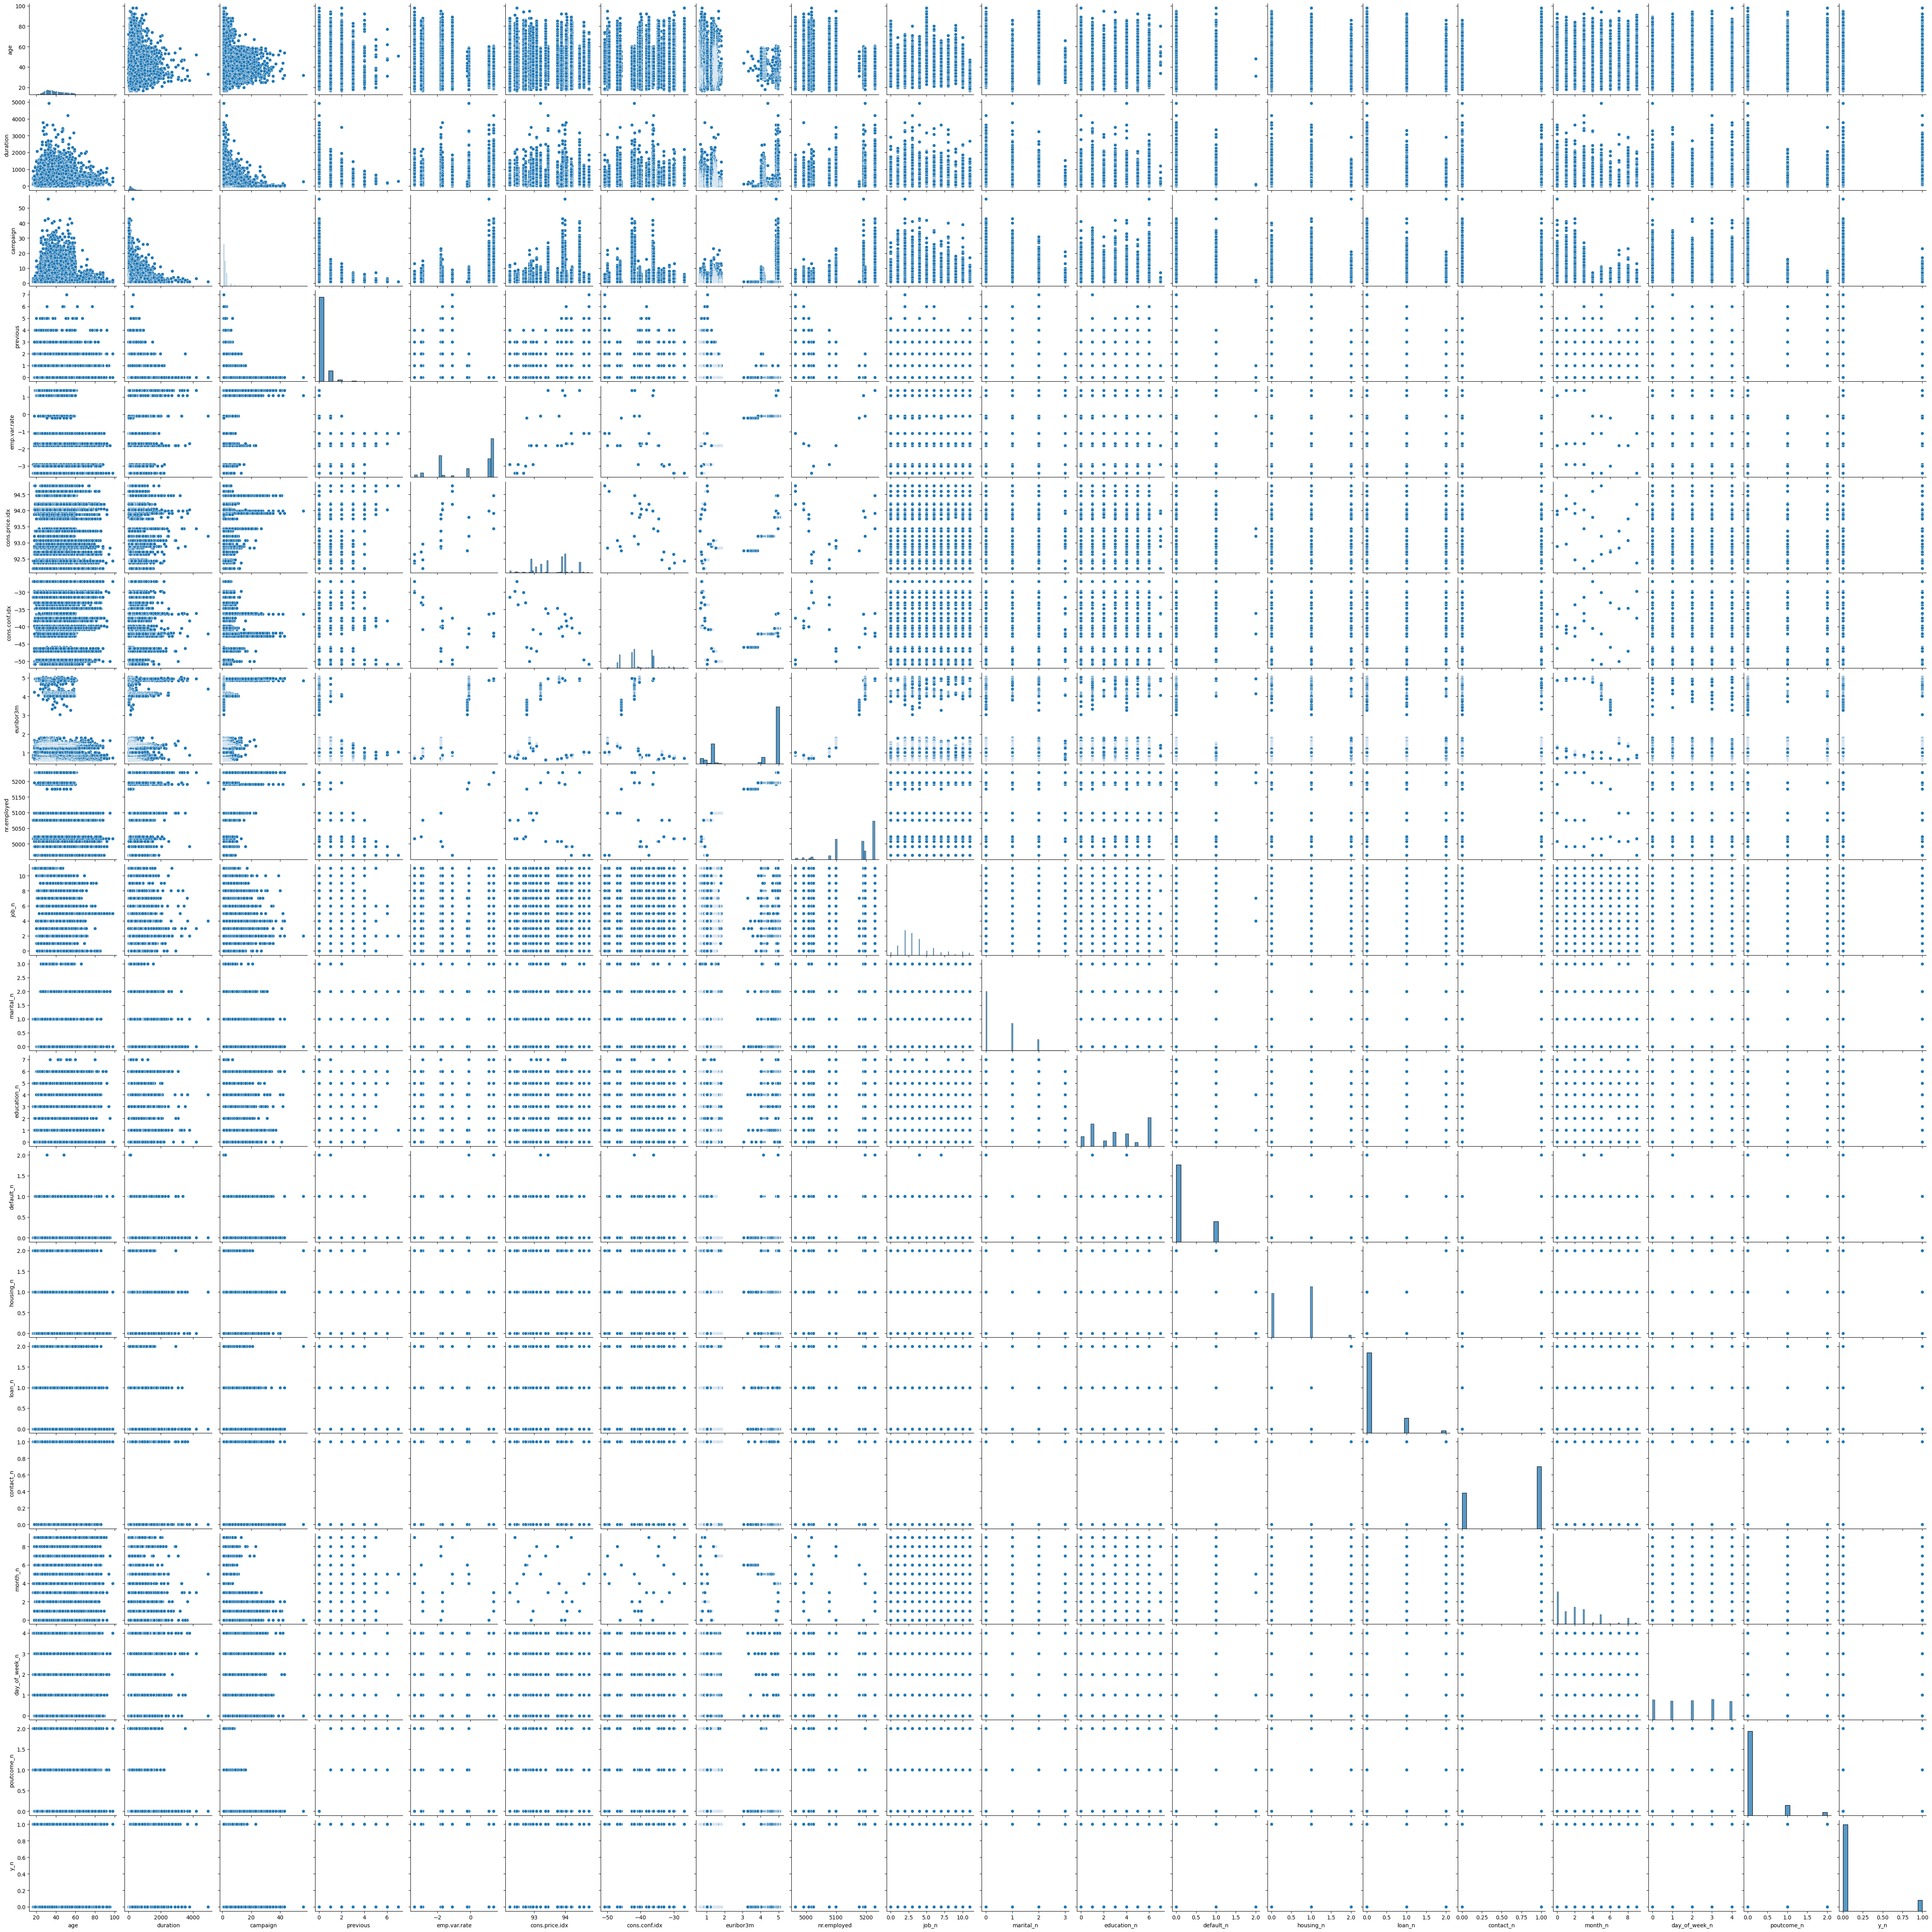

In [13]:
sns.pairplot(data = total_data)

In [14]:
#Outlier analysis
total_data.describe()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,y_n
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870,3.673863,0.510637,3.277370,0.208908,0.571959,0.199825,0.634714,2.249951,1.979600,0.169953,0.112663
std,10.42068,259.305321,2.770318,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364,2.454340,0.696794,2.185558,0.406713,0.541216,0.456055,0.481516,2.429157,1.411539,0.455811,0.316184
min,17.00000,0.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,38.00000,180.000000,2.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,3.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,2.000000,2.000000,0.000000,0.000000
75%,47.00000,319.000000,3.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,4.000000,1.000000,6.000000,0.000000,1.000000,0.000000,1.000000,3.000000,3.000000,0.000000,0.000000
max,98.00000,4918.000000,56.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,11.000000,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,9.000000,4.000000,2.000000,1.000000


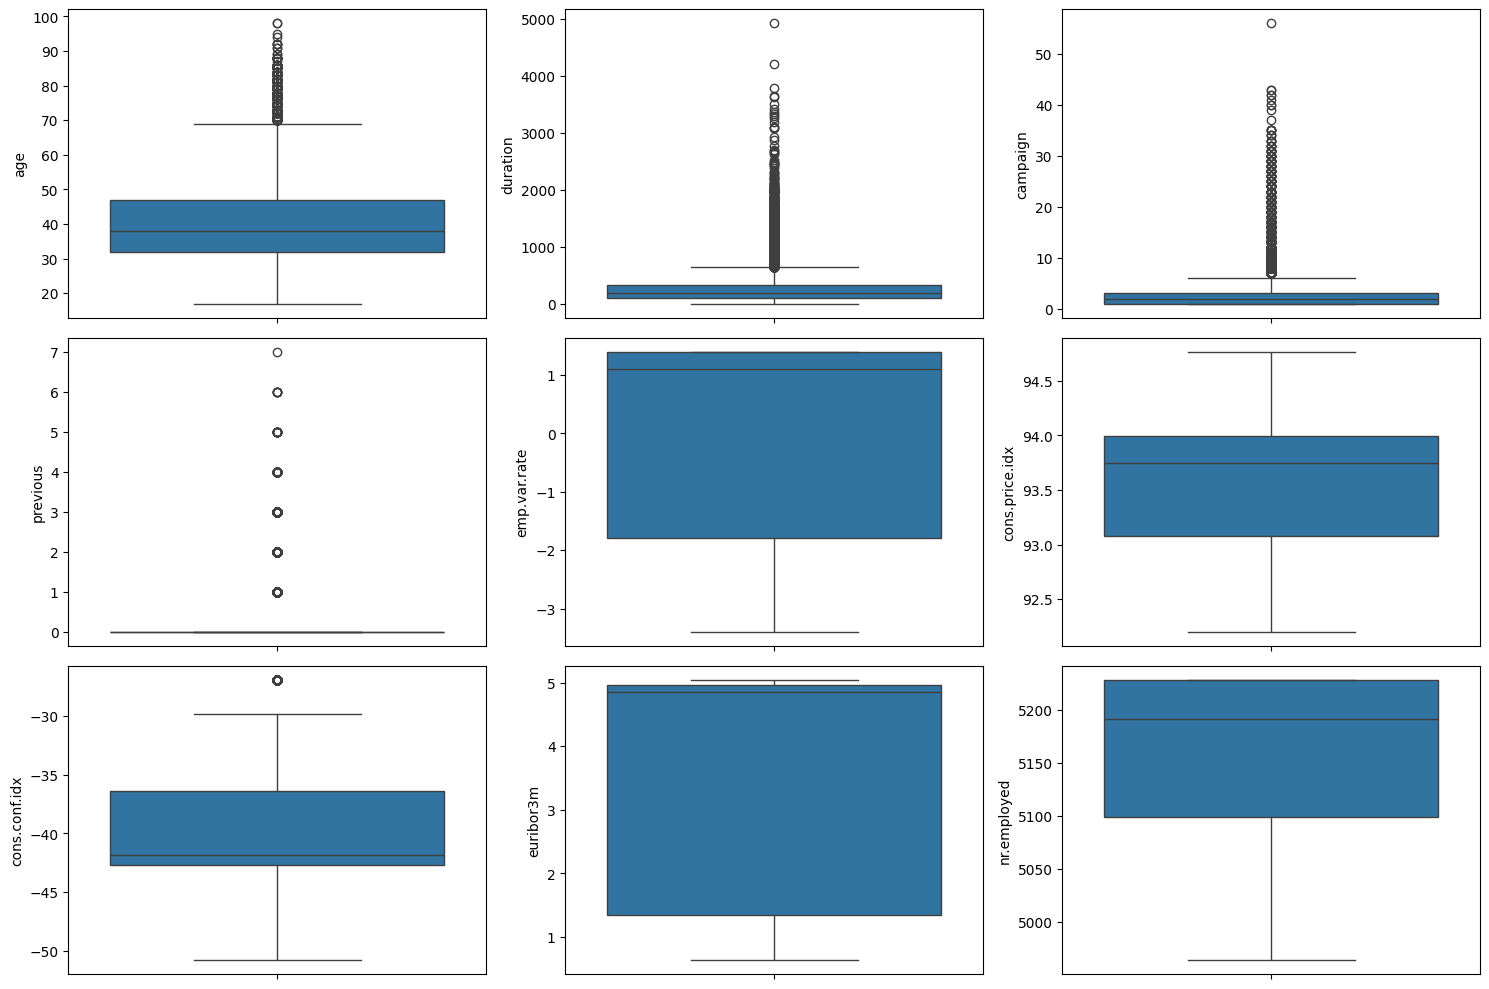

In [15]:


fig, axis = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = total_data, y = "age")
sns.boxplot(ax = axis[0, 1], data = total_data, y = "duration")
sns.boxplot(ax = axis[0, 2], data = total_data, y = "campaign")
sns.boxplot(ax = axis[1, 0], data = total_data, y = "previous")
sns.boxplot(ax = axis[1, 1], data = total_data, y = "emp.var.rate")
sns.boxplot(ax = axis[1, 2], data = total_data, y = "cons.price.idx")
sns.boxplot(ax = axis[2, 0], data = total_data, y = "cons.conf.idx")
sns.boxplot(ax = axis[2, 1], data = total_data, y = "euribor3m")
sns.boxplot(ax = axis[2, 2], data = total_data, y = "nr.employed")


plt.delaxes
plt.tight_layout()

plt.show()

In [16]:
total_data_no_outliers = total_data.copy() 

In [17]:
#Checking outliers in "age"
from statistics import mode

age_stats= total_data["age"].describe()
#print(age_stats)

age_iqr = age_stats["75%"] - age_stats["25%"]
age_upper_limit = age_stats["75%"] + 1.5*age_iqr
age_lower_limit = age_stats["25%"] - 1.5*age_iqr

age_mode=total_data['age'].mode()
print(age_mode)
print(f"The upper limit is {round(age_upper_limit, 2)} and the lower limit is {round(age_lower_limit, 2)}, with an interquartile range of {round(age_iqr, 2)}")


0    31
Name: age, dtype: int64
The upper limit is 69.5 and the lower limit is 9.5, with an interquartile range of 15.0


In [18]:
# Replacing outliers with the mode value
total_data_no_outliers['age'] = total_data_no_outliers['age'].apply(lambda x: age_mode[0] if x > 69.5 else x)
total_data_no_outliers.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,y_n
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,0,0,0,0,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,1,1,0,0,0,0,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,1,0,1,0,0,0,0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,2,0,0,0,0,0,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,1,0,0,1,0,0,0,0,0


In [19]:
#Checking outliers in "duration"
duration_stats = total_data["duration"].describe()
#print(duration_stats)

duration_iqr = duration_stats["75%"] - duration_stats["25%"]
duration_upper_limit = duration_stats["75%"] + 1.5*duration_iqr
duration_lower_limit = duration_stats["25%"] - 1.5*duration_iqr

duration_mode=total_data['duration'].mode()
print(duration_mode)
print(f"The upper limit is {round(duration_upper_limit, 2)} and the lower limit is {round(duration_lower_limit, 2)}, with an interquartile range of {round(duration_iqr, 2)}")


0    85
1    90
Name: duration, dtype: int64
The upper limit is 644.5 and the lower limit is -223.5, with an interquartile range of 217.0


In [20]:
# Replacing outliers with the mode value
total_data_no_outliers['duration'] = total_data_no_outliers['duration'].apply(lambda x: duration_mode[0] if x > 644.5 else x)
total_data_no_outliers.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,y_n
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,0,0,0,0,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,1,1,0,0,0,0,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,1,0,1,0,0,0,0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,2,0,0,0,0,0,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,1,0,0,1,0,0,0,0,0


In [21]:
#Checking outliers in "campaign"
campaign_stats = total_data["campaign"].describe()
#print(campaign_stats)

campaign_iqr = campaign_stats["75%"] - campaign_stats["25%"]
campaign_upper_limit = campaign_stats["75%"] + 1.5*campaign_iqr
campaign_lower_limit = campaign_stats["25%"] - 1.5*campaign_iqr

campaign_mode=total_data['campaign'].mode()
print(campaign_mode)
print(f"The upper limit is {round(campaign_upper_limit, 2)} and the lower limit is {round(campaign_lower_limit, 2)}, with an interquartile range of {round(campaign_iqr, 2)}")


0    1
Name: campaign, dtype: int64
The upper limit is 6.0 and the lower limit is -2.0, with an interquartile range of 2.0


In [22]:
# Replacing outliers with the mode value
total_data_no_outliers['campaign'] = total_data_no_outliers['campaign'].apply(lambda x: campaign_mode[0] if x > 6 else x)

In [23]:
#Missing Value Analysis
print(total_data.isnull().sum().sort_values(ascending=False))
print(total_data_no_outliers.isnull().sum().sort_values(ascending=False))


age               0
cons.conf.idx     0
poutcome_n        0
day_of_week_n     0
month_n           0
contact_n         0
loan_n            0
housing_n         0
default_n         0
education_n       0
marital_n         0
job_n             0
y                 0
nr.employed       0
euribor3m         0
cons.price.idx    0
job               0
emp.var.rate      0
poutcome          0
previous          0
campaign          0
duration          0
day_of_week       0
month             0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
y_n               0
dtype: int64
age               0
cons.conf.idx     0
poutcome_n        0
day_of_week_n     0
month_n           0
contact_n         0
loan_n            0
housing_n         0
default_n         0
education_n       0
marital_n         0
job_n             0
y                 0
nr.employed       0
euribor3m         0
cons.price.idx    0
job               0
emp.var.rate      0
poutcom

In [24]:
#Saving total_data_outliers + total_data_no_outliers
total_data.to_csv("/workspaces/machine-learning-your-first-ml-algorithm/data/processed/total_data.csv", index = False)
total_data_no_outliers.to_csv("/workspaces/machine-learning-your-first-ml-algorithm/data/processed/total_data_no_outliers.csv", index = False)


In [25]:
total_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'job_n', 'marital_n', 'education_n',
       'default_n', 'housing_n', 'loan_n', 'contact_n', 'month_n',
       'day_of_week_n', 'poutcome_n', 'y_n'],
      dtype='object')

In [26]:
from sklearn.model_selection import train_test_split


#Splitting total_data
predictoras = ['age', 'job_n', 'marital_n', 'education_n','default_n', 'housing_n', 'loan_n', 'contact_n', 'month_n','day_of_week_n', 'duration', 'campaign', 'previous','poutcome_n', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx','euribor3m', 'nr.employed']
target = 'y_n'

X = total_data[predictoras]
y = total_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 8)

X_train

,age,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,duration,campaign,previous,poutcome_n,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
27203,34,4,2,6,0,1,0,1,5,4,526,1,0,0,-0.1,93.200,-42.0,4.021,5195.8
29309,42,1,0,1,0,0,0,1,8,4,277,2,0,0,-1.8,93.075,-47.1,1.405,5099.1
6814,35,1,2,1,0,0,1,0,0,2,176,2,0,0,1.1,93.994,-36.4,4.857,5191.0
32134,35,1,1,1,0,0,0,1,0,4,198,1,0,0,-1.8,92.893,-46.2,1.313,5099.1
18805,33,2,1,4,0,1,0,1,2,3,143,4,0,0,1.4,93.918,-42.7,4.968,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10376,45,6,0,5,1,0,1,0,1,0,73,1,0,0,1.4,94.465,-41.8,4.960,5228.1
34949,25,4,1,3,0,1,0,1,0,4,14,4,0,0,-1.8,92.893,-46.2,1.250,5099.1
18417,56,10,0,0,1,1,1,1,2,3,14,20,0,0,1.4,93.918,-42.7,4.968,5228.1
25940,53,6,0,0,0,1,0,1,5,2,63,1,0,0,-0.1,93.200,-42.0,4.120,5195.8


In [27]:
#Splitting total_data_no_outliers
X = total_data_no_outliers[predictoras]
y = total_data_no_outliers[target]

X_train_no_outliers, X_test_no_outliers, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 8)

X_train_no_outliers

# %%
#Saving total_data (train + test) and total_data_no_ouliers (train + test)

X_train.to_csv("/workspaces/machine-learning-your-first-ml-algorithm/data/processed/X_train.csv", index = False)
X_test.to_csv("/workspaces/machine-learning-your-first-ml-algorithm/data/processed/X_test.csv", index = False)
X_train_no_outliers.to_csv("/workspaces/machine-learning-your-first-ml-algorithm/data/processed/X_train_no_outliers.csv", index = False)
X_test_no_outliers.to_csv("/workspaces/machine-learning-your-first-ml-algorithm/data/processed/X_test_no_outliers.csv", index = False)
y_train.to_csv("/workspaces/machine-learning-your-first-ml-algorithm/data/processed/y_train.csv", index = False)
y_test.to_csv("/workspaces/machine-learning-your-first-ml-algorithm/data/processed/y_test.csv", index = False)


In [28]:
from sklearn.preprocessing import StandardScaler
from pickle import dump

# Normalizing total_data

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = predictoras)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = predictoras)

X_train_norm.head()

,age,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,duration,campaign,previous,poutcome_n,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
27203,-0.584994,0.135635,2.138625,1.237446,-0.514619,0.786102,-0.437351,0.762340,1.135409,1.433268,1.032351,-0.561888,-0.346394,-0.370434,-0.119899,-0.656403,-0.326627,0.227605,0.397750
29309,0.183857,-1.089759,-0.733703,-1.047459,-0.514619,-1.060501,-0.437351,0.762340,2.370007,1.433268,0.073374,-0.202280,-0.346394,-0.370434,-1.204296,-0.872442,-1.428306,-1.281110,-0.938758
6814,-0.488888,-1.089759,2.138625,-1.047459,-0.514619,-1.060501,1.751912,-1.311751,-0.922254,0.017487,-0.315608,-0.202280,-0.346394,-0.370434,0.645558,0.715881,0.883059,0.709747,0.331408
32134,-0.488888,-1.089759,0.702461,-1.047459,-0.514619,-1.060501,-0.437351,0.762340,-0.922254,1.433268,-0.230879,-0.561888,-0.346394,-0.370434,-1.204296,-1.186996,-1.233892,-1.334169,-0.938758
18805,-0.681101,-0.681294,0.702461,0.323484,-0.514619,0.786102,-0.437351,0.762340,-0.099189,0.725377,-0.442702,0.516935,-0.346394,-0.370434,0.836922,0.584529,-0.477838,0.773764,0.844174


In [29]:
# Normalizing total_data_no_outliers

scaler = StandardScaler()
scaler.fit(X_train_no_outliers)

X_train_no_outliers_norm = scaler.transform(X_train_no_outliers)
X_train_no_outliers_norm = pd.DataFrame(X_train_no_outliers_norm, index = X_train_no_outliers.index, columns = predictoras)

X_test_no_outliers_norm = scaler.transform(X_test_no_outliers)
X_test_no_outliers_norm = pd.DataFrame(X_test_no_outliers_norm, index = X_test_no_outliers.index, columns = predictoras)

X_train_no_outliers_norm.head()

,age,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,duration,campaign,previous,poutcome_n,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
27203,-0.576660,0.135635,2.138625,1.237446,-0.514619,0.786102,-0.437351,0.762340,1.135409,1.433268,2.386524,-0.773105,-0.346394,-0.370434,-0.119899,-0.656403,-0.326627,0.227605,0.397750
29309,0.253781,-1.089759,-0.733703,-1.047459,-0.514619,-1.060501,-0.437351,0.762340,2.370007,1.433268,0.593073,0.018343,-0.346394,-0.370434,-1.204296,-0.872442,-1.428306,-1.281110,-0.938758
6814,-0.472855,-1.089759,2.138625,-1.047459,-0.514619,-1.060501,1.751912,-1.311751,-0.922254,0.017487,-0.134392,0.018343,-0.346394,-0.370434,0.645558,0.715881,0.883059,0.709747,0.331408
32134,-0.472855,-1.089759,0.702461,-1.047459,-0.514619,-1.060501,-0.437351,0.762340,-0.922254,1.433268,0.024066,-0.773105,-0.346394,-0.370434,-1.204296,-1.186996,-1.233892,-1.334169,-0.938758
18805,-0.680465,-0.681294,0.702461,0.323484,-0.514619,0.786102,-0.437351,0.762340,-0.099189,0.725377,-0.372078,1.601238,-0.346394,-0.370434,0.836922,0.584529,-0.477838,0.773764,0.844174


In [96]:

#Saving the normalization model
dump(scaler, open("/workspaces/machine-learning-your-first-ml-algorithm/models/normalizer.sav", "wb"))



In [31]:
#Saving total_data (normalized) and total_data_no_outliers (normalized)
X_train_norm.to_csv("/workspaces/machine-learning-your-first-ml-algorithm/data/processed/X_train_norm.csv", index = False)
X_test_norm.to_csv("/workspaces/machine-learning-your-first-ml-algorithm/data/processed/X_test_norm.csv", index = False)
X_train_no_outliers_norm.to_csv("/workspaces/machine-learning-your-first-ml-algorithm/data/processed/X_train_no_outliers_norm.csv", index = False)
X_test_no_outliers_norm.to_csv("/workspaces/machine-learning-your-first-ml-algorithm/data/processed/X_test_no_outliers_norm.csv", index = False)


In [32]:
from sklearn.preprocessing import MinMaxScaler

# Scalating total_data 

scaler2 = MinMaxScaler()
scaler2.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = predictoras)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = predictoras)

X_train_scal.head()

,age,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,duration,campaign,previous,poutcome_n,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
27203,-0.576660,0.135635,2.138625,1.237446,-0.514619,0.786102,-0.437351,0.762340,1.135409,1.433268,2.386524,-0.773105,-0.346394,-0.370434,-0.119899,-0.656403,-0.326627,0.227605,0.397750
29309,0.253781,-1.089759,-0.733703,-1.047459,-0.514619,-1.060501,-0.437351,0.762340,2.370007,1.433268,0.593073,0.018343,-0.346394,-0.370434,-1.204296,-0.872442,-1.428306,-1.281110,-0.938758
6814,-0.472855,-1.089759,2.138625,-1.047459,-0.514619,-1.060501,1.751912,-1.311751,-0.922254,0.017487,-0.134392,0.018343,-0.346394,-0.370434,0.645558,0.715881,0.883059,0.709747,0.331408
32134,-0.472855,-1.089759,0.702461,-1.047459,-0.514619,-1.060501,-0.437351,0.762340,-0.922254,1.433268,0.024066,-0.773105,-0.346394,-0.370434,-1.204296,-1.186996,-1.233892,-1.334169,-0.938758
18805,-0.680465,-0.681294,0.702461,0.323484,-0.514619,0.786102,-0.437351,0.762340,-0.099189,0.725377,-0.372078,1.601238,-0.346394,-0.370434,0.836922,0.584529,-0.477838,0.773764,0.844174


In [33]:
# Scalating total_data_no_outliers 

scaler2 = MinMaxScaler()
scaler2.fit(X_train_no_outliers)

X_train_no_outliers_scal = scaler.transform(X_train_no_outliers)
X_train_no_outliers_scal = pd.DataFrame(X_train_no_outliers_scal, index = X_train_no_outliers.index, columns = predictoras)

X_test_no_outliers_scal = scaler.transform(X_test_no_outliers)
X_test_no_outliers_scal = pd.DataFrame(X_test_no_outliers_scal, index = X_test_no_outliers.index, columns = predictoras)

X_train_no_outliers_scal.head()

,age,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,duration,campaign,previous,poutcome_n,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
27203,-0.576660,0.135635,2.138625,1.237446,-0.514619,0.786102,-0.437351,0.762340,1.135409,1.433268,2.386524,-0.773105,-0.346394,-0.370434,-0.119899,-0.656403,-0.326627,0.227605,0.397750
29309,0.253781,-1.089759,-0.733703,-1.047459,-0.514619,-1.060501,-0.437351,0.762340,2.370007,1.433268,0.593073,0.018343,-0.346394,-0.370434,-1.204296,-0.872442,-1.428306,-1.281110,-0.938758
6814,-0.472855,-1.089759,2.138625,-1.047459,-0.514619,-1.060501,1.751912,-1.311751,-0.922254,0.017487,-0.134392,0.018343,-0.346394,-0.370434,0.645558,0.715881,0.883059,0.709747,0.331408
32134,-0.472855,-1.089759,0.702461,-1.047459,-0.514619,-1.060501,-0.437351,0.762340,-0.922254,1.433268,0.024066,-0.773105,-0.346394,-0.370434,-1.204296,-1.186996,-1.233892,-1.334169,-0.938758
18805,-0.680465,-0.681294,0.702461,0.323484,-0.514619,0.786102,-0.437351,0.762340,-0.099189,0.725377,-0.372078,1.601238,-0.346394,-0.370434,0.836922,0.584529,-0.477838,0.773764,0.844174


In [95]:
#Saving the min-Max model
dump(scaler2, open("/workspaces/machine-learning-your-first-ml-algorithm/models/mmscaler.sav", "wb"))


In [35]:

#Saving total_data (scaled) and total_data_no_outliers (scaled)
X_train_scal.to_csv("/workspaces/machine-learning-your-first-ml-algorithm/data/processed/X_train_scal.csv", index = False)
X_test_scal.to_csv("/workspaces/machine-learning-your-first-ml-algorithm/data/processed/X_test_scal.csv", index = False)
X_test_no_outliers_scal.to_csv("/workspaces/machine-learning-your-first-ml-algorithm/data/processed/X_test_no_outliers_scal.csv", index = False)
X_train_no_outliers_scal.to_csv("/workspaces/machine-learning-your-first-ml-algorithm/data/processed/X_train_no_outliers_scal.csv", index = False)


In [36]:
from sklearn.feature_selection import f_classif, SelectKBest

#Feature selection (X_train + X_test)
selection_model = SelectKBest(f_classif, k = 9)
selection_model.fit(X_train, y_train)
bv_X_train = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[bv_X_train])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[bv_X_train])
X_train_sel.head()

,contact_n,month_n,duration,previous,poutcome_n,emp.var.rate,cons.price.idx,euribor3m,nr.employed
0,1.0,5.0,526.0,0.0,0.0,-0.1,93.200,4.021,5195.8
1,1.0,8.0,277.0,0.0,0.0,-1.8,93.075,1.405,5099.1
2,0.0,0.0,176.0,0.0,0.0,1.1,93.994,4.857,5191.0
3,1.0,0.0,198.0,0.0,0.0,-1.8,92.893,1.313,5099.1
4,1.0,2.0,143.0,0.0,0.0,1.4,93.918,4.968,5228.1


In [37]:
#Saving X_train_sel + X_test_sel after feature selection
X_train_sel["y_n"] = y_train.values
X_test_sel["y_n"] = y_test.values

X_train_sel.to_csv("/workspaces/machine-learning-your-first-ml-algorithm/data/processed/total_data_train_sel.csv", index = False)
X_test_sel.to_csv("/workspaces/machine-learning-your-first-ml-algorithm/data/processed/total_data_test_sel.csv", index = False)
X_train_sel.head()

,contact_n,month_n,duration,previous,poutcome_n,emp.var.rate,cons.price.idx,euribor3m,nr.employed,y_n
0,1.0,5.0,526.0,0.0,0.0,-0.1,93.200,4.021,5195.8,0
1,1.0,8.0,277.0,0.0,0.0,-1.8,93.075,1.405,5099.1,0
2,0.0,0.0,176.0,0.0,0.0,1.1,93.994,4.857,5191.0,0
3,1.0,0.0,198.0,0.0,0.0,-1.8,92.893,1.313,5099.1,0
4,1.0,2.0,143.0,0.0,0.0,1.4,93.918,4.968,5228.1,0


In [38]:
#Feature selection (X_train_no_outliers + X_test_no_outliers)
selection_model = SelectKBest(f_classif, k = 9)
selection_model.fit(X_train_no_outliers, y_train)
bv_X_train_no_outliers = selection_model.get_support()
X_train_no_outliers_sel = pd.DataFrame(selection_model.transform(X_train_no_outliers), columns = X_train.columns.values[bv_X_train_no_outliers])
X_test_no_outliers_sel = pd.DataFrame(selection_model.transform(X_test_no_outliers), columns = X_test.columns.values[bv_X_train_no_outliers])


In [39]:

#Saving X_train_no_outliers_sel + X_test_no_outliers_sel after feature selection
X_train_no_outliers_sel["y_n"] = list(y_train)
X_test_no_outliers_sel["y_n"] = list(y_test)

X_train_no_outliers_sel.to_csv("/workspaces/machine-learning-your-first-ml-algorithm/data/processed/total_data_no_outliers_train_sel.csv", index = False)
X_test_no_outliers_sel.to_csv("/workspaces/machine-learning-your-first-ml-algorithm/data/processed/total_data_no_outliers_test_sel.csv", index = False)
X_train_no_outliers_sel.head()

,contact_n,month_n,duration,previous,poutcome_n,emp.var.rate,cons.price.idx,euribor3m,nr.employed,y_n
0,1.0,5.0,526.0,0.0,0.0,-0.1,93.200,4.021,5195.8,0
1,1.0,8.0,277.0,0.0,0.0,-1.8,93.075,1.405,5099.1,0
2,0.0,0.0,176.0,0.0,0.0,1.1,93.994,4.857,5191.0,0
3,1.0,0.0,198.0,0.0,0.0,-1.8,92.893,1.313,5099.1,0
4,1.0,2.0,143.0,0.0,0.0,1.4,93.918,4.968,5228.1,0


In [40]:

#Feature selection (X_train_norm + X_test_norm)
selection_model = SelectKBest(f_classif, k = 9)
selection_model.fit(X_train_norm, y_train)
bv_X_train_norm = selection_model.get_support()
X_train_norm_sel = pd.DataFrame(selection_model.transform(X_train_norm), columns = X_train.columns.values[bv_X_train_norm])
X_test_norm_sel = pd.DataFrame(selection_model.transform(X_test_norm), columns = X_test.columns.values[bv_X_train_norm])


In [41]:
#Saving X_train_norm_sel + X_test_norm_sel after feature selection
X_train_norm_sel["y_n"] = list(y_train)
X_test_norm_sel["y_n"] = list(y_test)

X_train_norm_sel.to_csv("/workspaces/machine-learning-your-first-ml-algorithm/data/processed/total_data_norm_train_sel.csv", index = False)
X_test_norm_sel.to_csv("/workspaces/machine-learning-your-first-ml-algorithm/data/processed/total_data_norm_test_sel.csv", index = False)
X_train_norm_sel.head()


,contact_n,month_n,duration,previous,poutcome_n,emp.var.rate,cons.price.idx,euribor3m,nr.employed,y_n
0,0.762340,1.135409,1.032351,-0.346394,-0.370434,-0.119899,-0.656403,0.227605,0.397750,0
1,0.762340,2.370007,0.073374,-0.346394,-0.370434,-1.204296,-0.872442,-1.281110,-0.938758,0
2,-1.311751,-0.922254,-0.315608,-0.346394,-0.370434,0.645558,0.715881,0.709747,0.331408,0
3,0.762340,-0.922254,-0.230879,-0.346394,-0.370434,-1.204296,-1.186996,-1.334169,-0.938758,0
4,0.762340,-0.099189,-0.442702,-0.346394,-0.370434,0.836922,0.584529,0.773764,0.844174,0


In [42]:

#Feature selection (X_train_no_outliers_norm + X_test_no_outliers_norm)
selection_model = SelectKBest(f_classif, k = 9)
selection_model.fit(X_train_no_outliers_norm, y_train)
bv_X_train_no_outliers_norm = selection_model.get_support()
X_train_no_outliers_norm_sel = pd.DataFrame(selection_model.transform(X_train_no_outliers_norm), columns = X_train.columns.values[bv_X_train_no_outliers_norm])
X_test_no_outliers_norm_sel = pd.DataFrame(selection_model.transform(X_test_no_outliers_norm), columns = X_test.columns.values[bv_X_train_no_outliers_norm])


In [43]:

#Saving X_train_no_outliers_norm_sel + X_test_no_outliers_norm_sel after feature selection
X_train_no_outliers_norm_sel["y_n"] = list(y_train)
X_test_no_outliers_norm_sel["y_n"] = list(y_test)

X_train_no_outliers_norm_sel.to_csv("/workspaces/machine-learning-your-first-ml-algorithm/data/processed/total_data_no_outliers_norm_train_sel.csv", index = False)
X_test_no_outliers_norm_sel.to_csv("/workspaces/machine-learning-your-first-ml-algorithm/data/processed/total_data_no_outliers_norm_test_sel.csv", index = False)
X_train_no_outliers_norm_sel.head()


,contact_n,month_n,duration,previous,poutcome_n,emp.var.rate,cons.price.idx,euribor3m,nr.employed,y_n
0,0.762340,1.135409,2.386524,-0.346394,-0.370434,-0.119899,-0.656403,0.227605,0.397750,0
1,0.762340,2.370007,0.593073,-0.346394,-0.370434,-1.204296,-0.872442,-1.281110,-0.938758,0
2,-1.311751,-0.922254,-0.134392,-0.346394,-0.370434,0.645558,0.715881,0.709747,0.331408,0
3,0.762340,-0.922254,0.024066,-0.346394,-0.370434,-1.204296,-1.186996,-1.334169,-0.938758,0
4,0.762340,-0.099189,-0.372078,-0.346394,-0.370434,0.836922,0.584529,0.773764,0.844174,0


In [44]:
#Feature selection (X_train_scal + X_test_scal)
selection_model = SelectKBest(f_classif, k = 9)
selection_model.fit(X_train_scal, y_train)
bv_X_train_scal = selection_model.get_support()
X_train_scal_sel = pd.DataFrame(selection_model.transform(X_train_scal), columns = X_train.columns.values[bv_X_train_scal])
X_test_scal_sel = pd.DataFrame(selection_model.transform(X_test_scal), columns = X_test.columns.values[bv_X_train_scal])


In [45]:
#Saving X_train_scal_sel + X_test_scal_sel after feature selection
X_train_scal_sel["y_n"] = list(y_train)
X_test_scal_sel["y_n"] = list(y_test)

X_train_scal_sel.to_csv("/workspaces/machine-learning-your-first-ml-algorithm/data/processed/total_data_scal_train_sel.csv", index = False)
X_test_scal_sel.to_csv("/workspaces/machine-learning-your-first-ml-algorithm/data/processed/total_data_scal_test_sel.csv", index = False)
X_train_scal_sel.head()

,contact_n,month_n,duration,previous,poutcome_n,emp.var.rate,cons.price.idx,euribor3m,nr.employed,y_n
0,0.762340,1.135409,2.386524,-0.346394,-0.370434,-0.119899,-0.656403,0.227605,0.397750,0
1,0.762340,2.370007,0.593073,-0.346394,-0.370434,-1.204296,-0.872442,-1.281110,-0.938758,0
2,-1.311751,-0.922254,-0.134392,-0.346394,-0.370434,0.645558,0.715881,0.709747,0.331408,0
3,0.762340,-0.922254,0.024066,-0.346394,-0.370434,-1.204296,-1.186996,-1.334169,-0.938758,0
4,0.762340,-0.099189,-0.372078,-0.346394,-0.370434,0.836922,0.584529,0.773764,0.844174,0


In [46]:

#Feature selection (X_train_no_outliers_scal + X_test_no_outliers_scal)
selection_model = SelectKBest(f_classif, k = 9)
selection_model.fit(X_train_no_outliers_scal, y_train)
bv_X_train_no_outliers_scal = selection_model.get_support()
X_train_no_outliers_scal_sel = pd.DataFrame(selection_model.transform(X_train_no_outliers_scal), columns = X_train.columns.values[bv_X_train_no_outliers_scal])
X_test_no_outliers_scal_sel = pd.DataFrame(selection_model.transform(X_test_no_outliers_scal), columns = X_test.columns.values[bv_X_train_no_outliers_scal])


In [47]:
#Saving X_train_no_outliers_scal_sel + X_test_no_outliers_scal_sel after feature selection
X_train_no_outliers_scal_sel["y_n"] = list(y_train)
X_test_no_outliers_scal_sel["y_n"] = list(y_test)

X_train_no_outliers_scal_sel.to_csv("/workspaces/machine-learning-your-first-ml-algorithm/data/processed/total_data_no_outliers_scal_train_sel.csv", index = False)
X_test_no_outliers_scal_sel.to_csv("/workspaces/machine-learning-your-first-ml-algorithm/data/processed/total_data_no_outliers_scal_test_sel.csv", index = False)
X_train_no_outliers_scal_sel.head()



,contact_n,month_n,duration,previous,poutcome_n,emp.var.rate,cons.price.idx,euribor3m,nr.employed,y_n
0,0.762340,1.135409,2.386524,-0.346394,-0.370434,-0.119899,-0.656403,0.227605,0.397750,0
1,0.762340,2.370007,0.593073,-0.346394,-0.370434,-1.204296,-0.872442,-1.281110,-0.938758,0
2,-1.311751,-0.922254,-0.134392,-0.346394,-0.370434,0.645558,0.715881,0.709747,0.331408,0
3,0.762340,-0.922254,0.024066,-0.346394,-0.370434,-1.204296,-1.186996,-1.334169,-0.938758,0
4,0.762340,-0.099189,-0.372078,-0.346394,-0.370434,0.836922,0.584529,0.773764,0.844174,0


In [94]:

#Saving the feature selection model
dump(selection_model, open("/workspaces/machine-learning-your-first-ml-algorithm/models/selector.sav", "wb"))


In [49]:
#Reading the total_data_sel dataset
import pandas as pd

total_data_train_sel = pd.read_csv("/workspaces/machine-learning-your-first-ml-algorithm/data/processed/total_data_train_sel.csv")
total_data_test_sel = pd.read_csv("/workspaces/machine-learning-your-first-ml-algorithm/data/processed/total_data_test_sel.csv")
total_data_sel = pd.concat([total_data_train_sel, total_data_test_sel]).reset_index(drop = True)

X_train_sel = total_data_train_sel.drop(["y_n"], axis = 1)
X_test_sel = total_data_test_sel.drop(["y_n"], axis = 1)

In [50]:
#Initialization and training of the model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_sel, y_train)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:

#Model prediction
y_pred = model.predict(X_test_sel)
y_pred

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9063385412450417

In [56]:
#Reading the total_data_no_outliers_sel dataset
total_data_no_outliers_train_sel = pd.read_csv("/workspaces/machine-learning-your-first-ml-algorithm/data/processed/total_data_no_outliers_train_sel.csv")
total_data_no_outliers_test_sel = pd.read_csv("/workspaces/machine-learning-your-first-ml-algorithm/data/processed/total_data_no_outliers_test_sel.csv")
total_data_no_outliers_sel = pd.concat([total_data_no_outliers_train_sel, total_data_no_outliers_test_sel]).reset_index(drop = True)

X_train_no_outliers_sel = total_data_no_outliers_train_sel.drop(["y_n"], axis = 1)
X_test_no_outliers_sel = total_data_no_outliers_test_sel.drop(["y_n"], axis = 1)



In [57]:
#Initialization and training of the model
model = LogisticRegression()
model.fit(X_train_no_outliers_sel, y_train)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
#Model prediction
y_pred = model.predict(X_test_no_outliers_sel)
y_pred

accuracy_score(y_test, y_pred)

0.8982433416983728

In [59]:
#Reading the total_data_norm_sel dataset
total_data_norm_train_sel = pd.read_csv("/workspaces/machine-learning-your-first-ml-algorithm/data/processed/total_data_norm_train_sel.csv")
total_data_norm_test_sel = pd.read_csv("/workspaces/machine-learning-your-first-ml-algorithm/data/processed/total_data_norm_test_sel.csv")
total_data_norm_sel = pd.concat([total_data_norm_train_sel, total_data_norm_test_sel]).reset_index(drop = True)

X_train_norm_sel = total_data_norm_train_sel.drop(["y_n"], axis = 1)
X_test_norm_sel = total_data_norm_test_sel.drop(["y_n"], axis = 1)


In [60]:

#Initialization and training of the model
model = LogisticRegression()
model.fit(X_train_norm_sel, y_train)

LogisticRegression()

In [61]:
#Model prediction
y_pred = model.predict(X_test_norm_sel)
y_pred


accuracy_score(y_test, y_pred)

0.9069052052133085

In [62]:
#Reading the total_data_no_outliers_norm
total_data_no_outliers_norm_train_sel = pd.read_csv("/workspaces/machine-learning-your-first-ml-algorithm/data/processed/total_data_no_outliers_norm_train_sel.csv")
total_data_no_outliers_norm_test_sel = pd.read_csv("/workspaces/machine-learning-your-first-ml-algorithm/data/processed/total_data_no_outliers_norm_test_sel.csv")
total_data_no_outliers_norm_sel = pd.concat([total_data_no_outliers_norm_train_sel, total_data_no_outliers_norm_test_sel]).reset_index(drop = True)

X_train_no_outliers_norm_sel = total_data_no_outliers_norm_train_sel.drop(["y_n"], axis = 1)
X_test_no_outliers_norm_sel = total_data_no_outliers_norm_test_sel.drop(["y_n"], axis = 1)

In [63]:
#Initialization and training of the model
model = LogisticRegression()
model.fit(X_train_no_outliers_norm_sel, y_train)




LogisticRegression()

In [64]:
#Model prediction
y_pred = model.predict(X_test_no_outliers_norm_sel)
y_pred

accuracy_score(y_test, y_pred)

0.898729053671173

In [65]:
#Reading the total_data_scal_sel dataset
total_data_scal_train_sel = pd.read_csv("/workspaces/machine-learning-your-first-ml-algorithm/data/processed/total_data_scal_train_sel.csv")
total_data_scal_test_sel = pd.read_csv("/workspaces/machine-learning-your-first-ml-algorithm/data/processed/total_data_scal_test_sel.csv")
total_data_scal_sel = pd.concat([total_data_scal_train_sel, total_data_scal_test_sel]).reset_index(drop = True)

X_train_scal_sel = total_data_scal_train_sel.drop(["y_n"], axis = 1)
X_test_scal_sel = total_data_scal_test_sel.drop(["y_n"], axis = 1)

In [66]:
#Initialization and training of the model
model = LogisticRegression()
model.fit(X_train_scal_sel, y_train)

LogisticRegression()

In [67]:
#Model prediction
y_pred = model.predict(X_test_scal_sel)
y_pred

accuracy_score(y_test, y_pred)

0.9068242532178418

In [68]:

#Reading the total_data_no_outliers_scal dataset
total_data_no_outliers_scal_train_sel = pd.read_csv("/workspaces/machine-learning-your-first-ml-algorithm/data/processed/total_data_no_outliers_scal_train_sel.csv")
total_data_no_outliers_scal_test_sel = pd.read_csv("/workspaces/machine-learning-your-first-ml-algorithm/data/processed/total_data_no_outliers_scal_test_sel.csv")
total_data_no_outliers_scal_sel = pd.concat([total_data_no_outliers_scal_train_sel, total_data_no_outliers_scal_test_sel]).reset_index(drop = True)

X_train_no_outliers_scal_sel = total_data_no_outliers_scal_train_sel.drop(["y_n"], axis = 1)
X_test_no_outliers_scal_sel = total_data_no_outliers_scal_test_sel.drop(["y_n"], axis = 1)

In [69]:
#Initialization and training of the model
model = LogisticRegression()
model.fit(X_train_no_outliers_scal_sel, y_train)

LogisticRegression()

In [70]:
#Model prediction
y_pred = model.predict(X_test_no_outliers_scal_sel)
y_pred

accuracy_score(y_test, y_pred)

0.898729053671173

The dataset that got the best results is total_data_norm_sel, so we'll choose this one for the optimization. 

In [86]:
#Grid search
from sklearn.model_selection import GridSearchCV

# We define the parameters that we want to adjust by hand
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "dual": [True, False],
    "fit_intercept": [True, False],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# We initialize the grid
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'dual': [True, False], 'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [87]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train_norm_sel, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'C': 0.1, 'dual': True, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'liblinear'}


In [92]:
grid.best_estimator_

LogisticRegression(C=0.1, dual=True, solver='liblinear')

In [88]:
model_grid = LogisticRegression(C=0.1, penalty= "l2", solver="liblinear", random_state=8, dual=True, fit_intercept=True)
model_grid.fit(X_train_norm_sel, y_train)
y_pred = model_grid.predict(X_test_norm_sel)

In [89]:
grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

0.9069861572087752

In [93]:
from pickle import dump
dump(model_grid, open("/workspaces/machine-learning-your-first-ml-algorithm/models/logistic_regression_C-0.1_penalty-l2_dual-True_intercept-True_solver-liblinear_8.sav", "wb"))